# Assignment 04: Constructing Confidence Interval

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
import matplotlib.pyplot as plt
seed=1110
np.random.seed(seed)

## Question 1 - <span style="color:green">[100]</span>
You are going to work on a dataset which lists some features of the soccer players participated in the 2022 FIFA World Cup. We want to predict the players value and quantify the uncertainty of our prediction using what we learnt in week 4. The dataset has the following attributes:
- `Age`: Player age in years
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

Therefore the target is `Value`.

### Q 1.1 - <span style="color:red">[1]</span> - Load `data.csv` and show the first 5 rows.

In [2]:
# style for ploting
sns.set_style("darkgrid")

# read dataset
df = pd.read_csv('data.csv')

# show 5 first row
print(df.head(5))

   Age  Overall  Potential        Value      Wage Preferred Foot  \
0   27       87         88   91000000.0  115000.0          Right   
1   27       86         87   78500000.0  190000.0          Right   
2   30       85         85   46500000.0   46000.0           Left   
3   31       91         91  107500000.0  350000.0          Right   
4   25       86         89   89500000.0  110000.0          Right   

   International Reputation  Weak Foot  Skill Moves Body Type Position  \
0                       4.0        4.0          3.0    Stocky  Reserve   
1                       3.0        3.0          4.0    Stocky   Middle   
2                       2.0        3.0          3.0    Stocky     Back   
3                       4.0        5.0          4.0    Stocky   Middle   
4                       3.0        3.0          3.0    Normal   Middle   

   Height  Weight  
0     189      82  
1     179      69  
2     172      69  
3     181      70  
4     172      68  


### Q 1.2 - <span style="color:red">[3]</span> - Use a pandas relevant method to reveal `Dtype` of the features and indicate whether the date set has any `Null` values. 

In [3]:
#
print('=' * 40)
# print datatype of each column
print('Type of each column of the dataset:')
print(df.dtypes)

print('=' * 40)
print('Number of null value in each column:')
# number of null in each column
print(df.isna().sum(axis='index'))
print('=' * 40)



Type of each column of the dataset:
Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Body Type                    object
Position                     object
Height                        int64
Weight                        int64
dtype: object
Number of null value in each column:
Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Body Type                   0
Position                    0
Height                      0
Weight                      0
dtype: int64


#### *Written Answer: As depicted in the above, there is no null value. Also, type of each column is shown in the above*


### Q 1.3 - <span style="color:red">[3]</span> - Use a pandas relevant method to get a summary statistics of the data and inspect it. Which features have the lowest and highest standard deviation respectively? What was the age of the youngest player in the World Cup? 

In [4]:
#
print('Describtion of the dataset:')
# summary of the dataset
summary = df.describe()
print(summary)

# lowest std
print('\nFeature with lowest std: {}'.format(summary.loc['std'].idxmin()))


# highest std
print('Feature with highest std: {}'.format(summary.loc['std'].idxmax()))

# youngest player
print('Yougest plager: {} years'.format(summary.loc['min', 'Age']))

Describtion of the dataset:
                Age       Overall     Potential         Value           Wage  \
count  17591.000000  17591.000000  17591.000000  1.759100e+04   17591.000000   
mean      23.109317     63.354954     70.973907  2.759077e+06    8244.784265   
std        4.623732      8.029464      6.523326  7.852143e+06   20502.356045   
min       15.000000     44.000000     47.000000  1.000000e+03     500.000000   
25%       20.000000     58.000000     67.000000  3.250000e+05     600.000000   
50%       22.000000     63.000000     71.000000  7.000000e+05    2000.000000   
75%       26.000000     69.000000     75.000000  1.800000e+06    6000.000000   
max       54.000000     91.000000     95.000000  1.905000e+08  450000.000000   

       International Reputation     Weak Foot   Skill Moves        Height  \
count              17591.000000  17591.000000  17591.000000  17591.000000   
mean                   1.103405      2.899324      2.300097    180.893639   
std                 

#### *Written Answer:*
Feature with lowest std: International Reputation

Feature with highest std: Value

Yougest plager: 15.0 years


### Q 1.4 - <span style="color:red">[4]</span> - Use a pandas relevant method to see the distribution of the numerical features all in one plot window. Which ones look like Gaussian?

<Figure size 640x480 with 0 Axes>

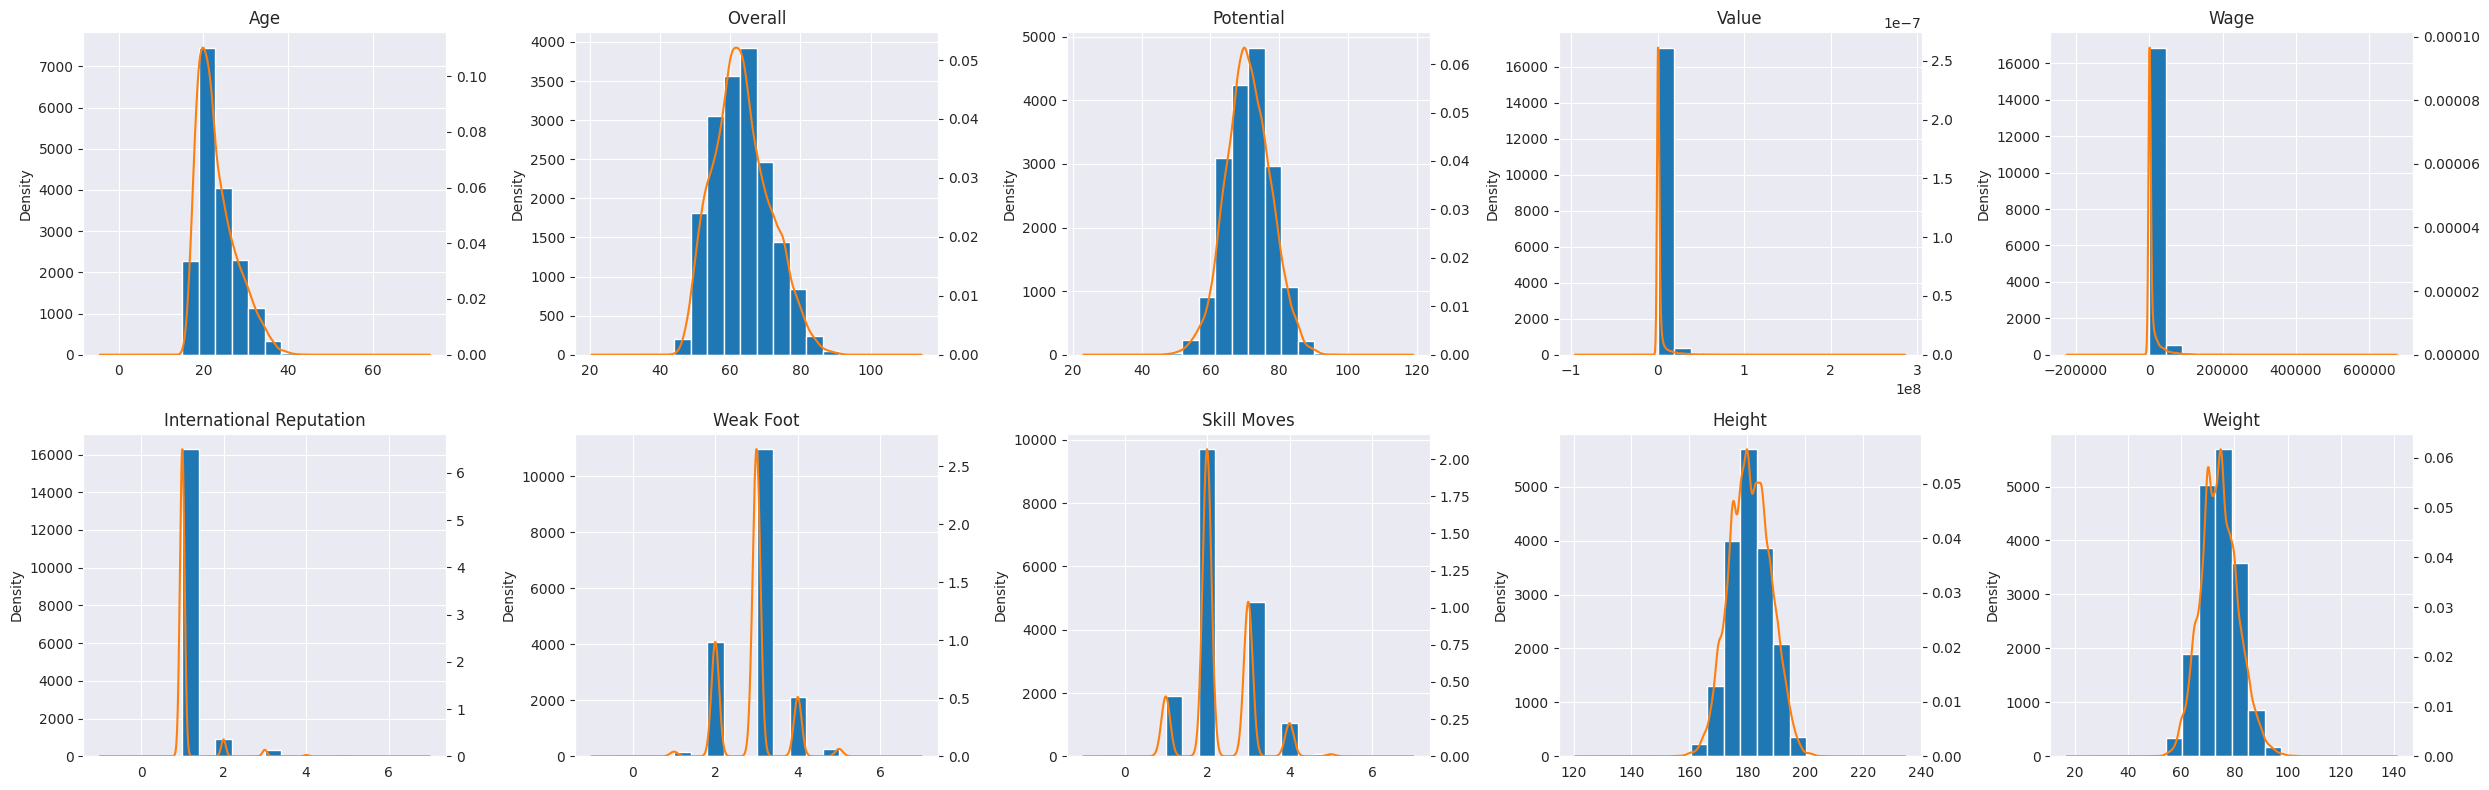

In [5]:
# plot distribution of different features in on plot 
plt.figure()

# numerical columns
numerical_col_names = df.select_dtypes(include=np.number).columns

# create a figure with subplots
n_col = 5
n_row = 2
fig, axes = plt.subplots(n_row, n_col, figsize=(n_col * 5, n_row * 4))

# plot histogram and kde of each numerical value in the dataset
for i, name in enumerate(numerical_col_names):
    r, c = i // n_col, i % n_col
    ax = axes[r, c]
    # histogram
    df[name].hist(ax=ax)
    # kde
    ax2 = df[name].plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

plt.show()

#### *Written Answer:* Among the numerical features, Overal, Height and Weight have the most similarity to gaussian distribution.


### Q 1.5 - <span style="color:red">[2]</span> - Perform one hot encoding to prepare the categorical values for linear regression.

In [6]:
#
# one hot encodings of categorical values
df = pd.get_dummies(data=df) 

# print 5 first rows
print(df.head(5))

   Age  Overall  Potential        Value      Wage  International Reputation  \
0   27       87         88   91000000.0  115000.0                       4.0   
1   27       86         87   78500000.0  190000.0                       3.0   
2   30       85         85   46500000.0   46000.0                       2.0   
3   31       91         91  107500000.0  350000.0                       4.0   
4   25       86         89   89500000.0  110000.0                       3.0   

   Weak Foot  Skill Moves  Height  Weight  Preferred Foot_Left  \
0        4.0          3.0     189      82                    0   
1        3.0          4.0     179      69                    0   
2        3.0          3.0     172      69                    1   
3        5.0          4.0     181      70                    0   
4        3.0          3.0     172      68                    0   

   Preferred Foot_Right  Body Type_Lean  Body Type_Normal  Body Type_Stocky  \
0                     1               0          

### Q 1.6 - <span style="color:red">[4]</span> - Use `seaborn.jointplot` to investigate the relationship between `Overall` and `Value` as well as `Wage` and `Value`.

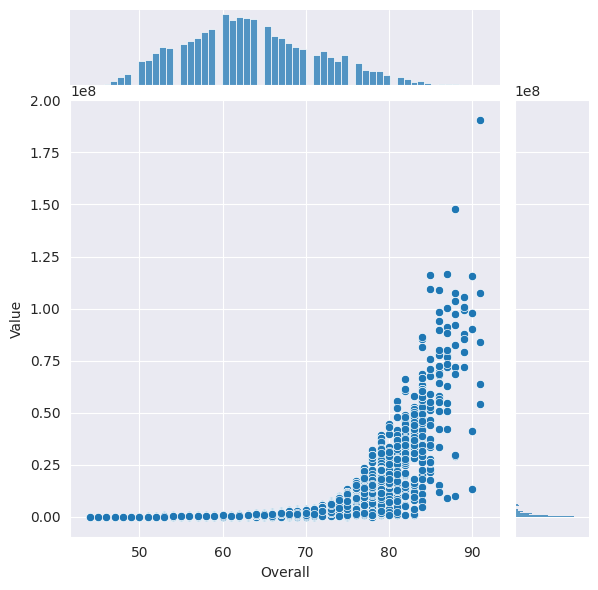

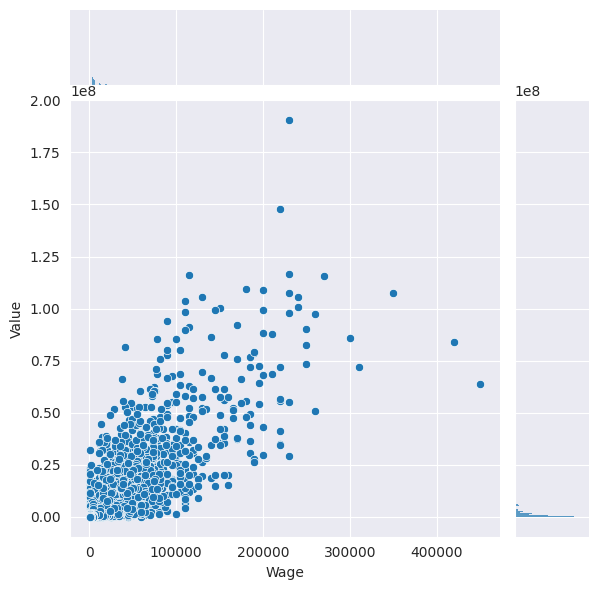

In [7]:
#

# joint plot of Overal and value
sns.jointplot(data=df, x=df['Overall'], y=df['Value'])

# joint plot of Wage and value
sns.jointplot(data=df, x=df['Wage'], y=df['Value'])

plt.show()

### Q 1.7 - <span style="color:red">[8]</span> - Where applicable, use logarithm function to transform either `Overall`, `Wage`, or `Value` to make them better fit the assumptions of linear regression. `Joinplot` the transformed versions.

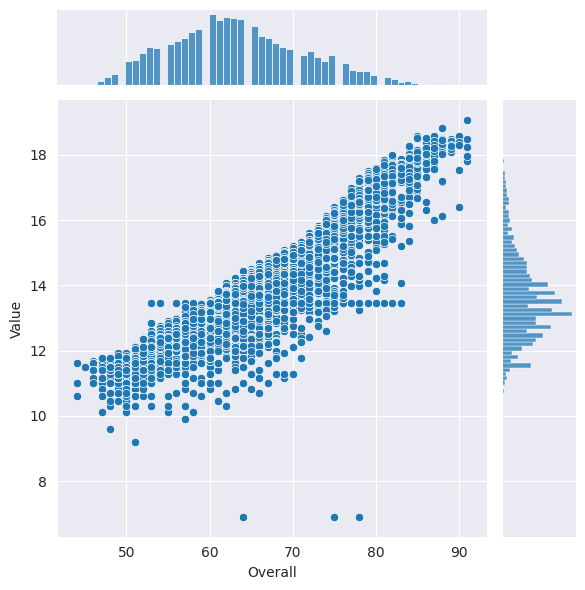

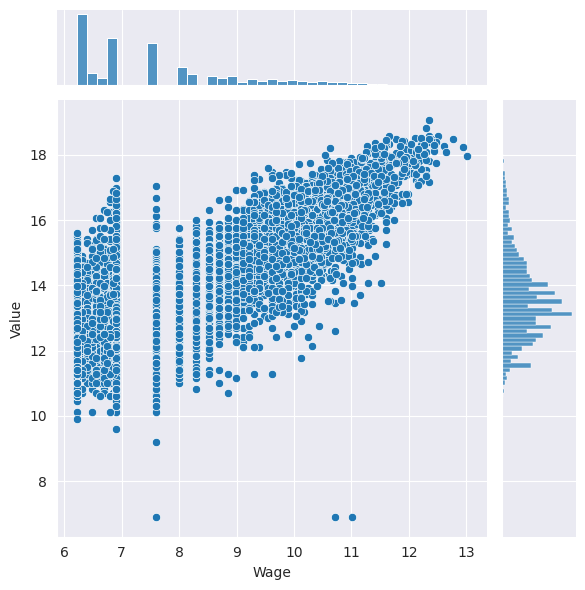

In [8]:
#
# As it is shown in 1.4, distribution of "Value" and "Wage" are highly skewed. We used log to transform them.

# joint plot of Overal and value
sns.jointplot(data=df, x=df['Overall'], y=np.log(df['Value']))

# joint plot of Wage and value
sns.jointplot(data=df, x=np.log(df['Wage']), y=np.log(df['Value']))

plt.show()

### Q 1.8 - <span style="color:red">[4]</span> - Add the transformed version of the variables which you chose to transform as new columns to your dataframe.

In [9]:
# Add transform columns with log to data frame
df['Value_log'] = np.log(df['Value'])
df['Wage_log'] = np.log(df['Wage'])

# drop old values
df = df.drop(labels=['Value', 'Wage'], axis='columns')

# print top 5 rows
print(df.head(5))

   Age  Overall  Potential  International Reputation  Weak Foot  Skill Moves  \
0   27       87         88                       4.0        4.0          3.0   
1   27       86         87                       3.0        3.0          4.0   
2   30       85         85                       2.0        3.0          3.0   
3   31       91         91                       4.0        5.0          4.0   
4   25       86         89                       3.0        3.0          3.0   

   Height  Weight  Preferred Foot_Left  Preferred Foot_Right  Body Type_Lean  \
0     189      82                    0                     1               0   
1     179      69                    0                     1               0   
2     172      69                    1                     0               0   
3     181      70                    0                     1               0   
4     172      68                    0                     1               0   

   Body Type_Normal  Body Type_Stocky 

### Q 1.9 - <span style="color:red">[4]</span> - Use `pandas.corr()` to output the pairwise correlation between every feature and the target.

In [10]:
# calculate correlation matrix
correlation_mat = df.corr()

print('\n>  Correlation of each feature with the target (Log Value):')
print(correlation_mat.loc['Value_log', :])


>  Correlation of each feature with the target (Log Value):
Age                         0.301584
Overall                     0.922363
Potential                   0.826055
International Reputation    0.421334
Weak Foot                   0.269339
Skill Moves                 0.471930
Height                      0.026671
Weight                      0.082446
Preferred Foot_Left         0.066395
Preferred Foot_Right       -0.066395
Body Type_Lean             -0.040339
Body Type_Normal           -0.022794
Body Type_Stocky            0.138729
Position_Back               0.223549
Position_Forward            0.149346
Position_Middle             0.233806
Position_Reserve           -0.395012
Value_log                   1.000000
Wage_log                    0.772331
Name: Value_log, dtype: float64


### Q 1.10 - <span style="color:red">[4]</span> - What are the most positively and negatively correlated features? How do you interpret the positive and negative correlations?

#### *Written Answer:*

Most positively correlated features in order are (Overall, Potential, Skill Moves, International Reputation). Among them, (Overall) has the highest positive correlation. Positive correlation means by increasing the target, the feature will increase.


Most negatively correlated features in order are (Position_Reserve, Preferred Foot_Left, Body Type_lean). Among them, (Position_Reserve) has the highest negative correlation. Negative correlation means by increasing the target, the feature will decrease.



### Q 1.11 - <span style="color:red">[15]</span> - Let's train a model to predict player `Value` using all features except some (Hint: think about those which you transformed)
1. This time instead of R-squared, use the `mean_squared_error` to calculate Root Mean Squared Error (RMSE) as your model scorer
2. Split the data into train and test with `test_size=0.2, random_state=seed`
3. Pick `LinearRegression()` from sklearn as your model
4. Report both prediction (*i.e.*, on training set) and generalization (*i.e.*, on test set) RMSE scores of your model

In [11]:
#

# seperate features and target
X_all = df.drop('Value_log', axis='columns')
y_all = df['Value_log']


# name of used feature, previously old value of log transformed features were droped.
print('> Used Features Names: {}'.format(X_all.columns))
print('> Target Name: {}'.format('Value_log'))

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=seed)
# print('\nShape of Train X: {}'.format(X_train.shape))
# print('Shape of Train y: {}'.format(y_train.shape))
# print('Shape of Test X: {}'.format(X_test.shape))
# print('Shape of Test y: {}\n'.format(y_test.shape))

# linear regression
classifier_lr_1 = LinearRegression()
# train linear regression with training set
classifier_lr_1.fit(X=X_train, y=y_train)

# predict with train set
y_train_pred = classifier_lr_1.predict(X=X_train)
# predict with test set
y_test_pred = classifier_lr_1.predict(X=X_test)

# RMSE on train (Log Value)
rmse_train_log = mean_squared_error(y_true=y_train, y_pred=y_train_pred, squared=False)
# RMSE on test (Log Value)
rmse_test_log = mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)

print('\nRMSE on Train (Log Value): {}'.format(rmse_train_log))
print('RMSE on Test  (Log Value):  {}'.format(rmse_test_log))


# RMSE on train (Log Value)
rmse_train_nolog = mean_squared_error(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred), squared=False)
# RMSE on test (Log Value)
rmse_test_nolog = mean_squared_error(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred), squared=False)

print('\nRMSE on Train (Value): {}'.format(rmse_train_nolog))
print('RMSE on Test  (Value):  {}'.format(rmse_test_nolog))

> Used Features Names: Index(['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Height', 'Weight', 'Preferred Foot_Left',
       'Preferred Foot_Right', 'Body Type_Lean', 'Body Type_Normal',
       'Body Type_Stocky', 'Position_Back', 'Position_Forward',
       'Position_Middle', 'Position_Reserve', 'Wage_log'],
      dtype='object')
> Target Name: Value_log

RMSE on Train (Log Value): 0.29829304894415365
RMSE on Test  (Log Value):  0.31729280161860846

RMSE on Train (Value): 2320529.1221342008
RMSE on Test  (Value):  2279808.7582900543


### Q 1.12 - <span style="color:red">[8]</span> - Scatter plot `Overall` vs true `Value` as well as `Overall` vs predicted `Value` in the same graph window over the test set. 

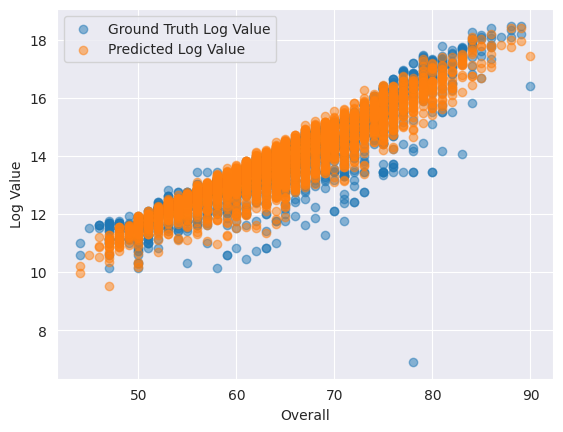

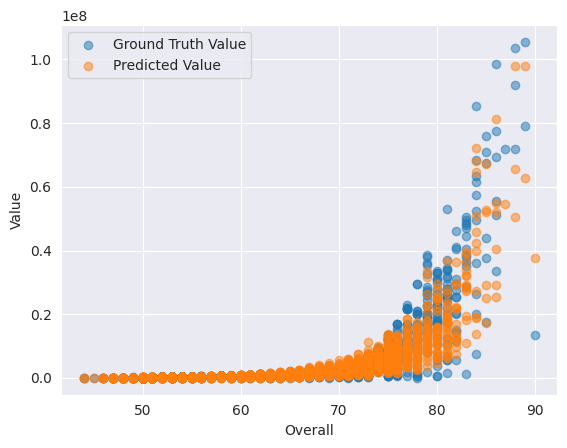

In [12]:
#
plt.figure()
plt.scatter(x=X_test['Overall'], y=y_test, label='Ground Truth Log Value', alpha=0.5)
plt.scatter(x=X_test['Overall'], y=y_test_pred, label='Predicted Log Value', alpha=0.5)
plt.xlabel('Overall')
plt.ylabel('Log Value')
plt.legend()

plt.figure()
plt.scatter(x=X_test['Overall'], y=np.exp(y_test), label='Ground Truth Value', alpha=0.5)
plt.scatter(x=X_test['Overall'], y=np.exp(y_test_pred), label='Predicted Value', alpha=0.5)
plt.xlabel('Overall')
plt.ylabel('Value')
plt.legend()

plt.show()

### Q 1.13 - <span style="color:red">[15]</span> - Calculate confidence interval (based on 99% confidence level) for mean `Value` by bootstrapping. For this purpose, code a bootstrap function that in each bootstrap iteration, samples from the training set to fit the linear regression model and uses the test set to make predictions - therefore your bootstrap statistic is the average of the predictions over the test set. Your function must take as input arguments: your model, Xtrain, ytrain, Xtest, and numboot=100. The function must return only one object that is the array of recorded values for the bootstrap statistic.

In [13]:
#
def bootsrap_value(Xtrain, ytrain, Xtest, numboot=100):

    # create array to save mean Value of test set for different iterations
    test_mean_log_values = np.zeros(shape=numboot)
    test_mean_values = np.zeros(shape=numboot)

    # number of data in train dataset
    n = Xtrain.shape[0]

    # craete a copy of Xtrain with value column for sampling process
    traincopy = Xtrain.copy()
    traincopy['log_value'] = ytrain

    for i in range(0, numboot):
        # sample from train set
        trainsampled = traincopy.sample(n, replace=True)
        ytrainsampled = trainsampled['log_value']
        Xtrainsampled = trainsampled.drop(labels=['log_value'], axis='columns')

        # linear regression
        classifier_lr_temp = LinearRegression().fit(X=Xtrainsampled, y=ytrainsampled)

        # predict values by test set
        ytestpred_log = classifier_lr_temp.predict(X=Xtest)

        # calculate mean of the predictions
        test_mean_log_values[i] = np.mean(ytestpred_log)        
        test_mean_values[i] = np.mean(np.exp(ytestpred_log))

    return {'bootstraping_mean_log_value': test_mean_log_values, 'bootstraping_mean_value': test_mean_values} 

# call bootstraping 
test_mean_values_bootstrap = bootsrap_value(Xtrain=X_train, ytrain=y_train, Xtest=X_test, numboot=100)

# mean of log value on sample test set
test_mean_pred_log_values_sample = np.mean(y_test_pred)
test_mean_log_value = np.mean(y_test)

# mean of value on sample test set
test_mean_pred_values_sample = np.mean(np.exp(y_test_pred))
test_mean_value = np.mean(np.exp(y_test))

# calculate confidence level
boot_CL = 99/100
p1 = (1  -boot_CL)/2
p2 = 1 - p1

# calculate quantile
boot_quant = np.quantile(test_mean_values_bootstrap['bootstraping_mean_log_value']-test_mean_pred_log_values_sample, [p1, p2])
boot_ci = [test_mean_pred_log_values_sample + boot_quant[0], test_mean_pred_log_values_sample + boot_quant[1]]
print('>    Confidence Interval with bootsrapping for CL of 99% on predicted test mean (Log Value): {}'.format(boot_ci))
print()

# calculate quantile
boot_quant = np.quantile(test_mean_values_bootstrap['bootstraping_mean_value']-test_mean_pred_values_sample, [p1, p2])
boot_ci = [test_mean_pred_values_sample + boot_quant[0], test_mean_pred_values_sample + boot_quant[1]]
print('>    Confidence Interval with bootsrapping for CL of 99% on predicted test mean (Value):     {}'.format(boot_ci))

>    Confidence Interval with bootsrapping for CL of 99% on predicted test mean (Log Value): [13.635777428996636, 13.648169717926324]

>    Confidence Interval with bootsrapping for CL of 99% on predicted test mean (Value):     [2359762.8759521986, 2457474.4823101037]


### Q 1.14 - <span style="color:red">[6]</span> - Construct a 99% confidence interval using the Central Limit Theorem. 

In [14]:
from scipy.stats import norm 

# mean and standad deviation of log Value in predicted test set
test_mean_log_value_pred = np.mean(y_test_pred) 
test_std_log_value_pred = np.std(y_test_pred)
# calculate standard error
std_error_log_pred = test_std_log_value_pred / np.sqrt(len(y_test_pred))

# critical value for 99%
alpha = (1/100)
alpha = 1-(alpha/2)
critical_value_log_pred = norm.ppf(alpha)

# calculate confidece interval using CLT
norm_ci = [(test_mean_log_value_pred - critical_value_log_pred * std_error_log_pred), 
           (test_mean_log_value_pred + critical_value_log_pred * std_error_log_pred)] 

print('\n>  CLT CI 99% mean predicted (Log Value):        {}'.format(norm_ci))


# mean and standad deviation of Value in predicted test set
test_mean_value_pred = np.mean(np.exp(y_test_pred)) 
test_std_value_pred = np.std(np.exp(y_test_pred))
# calculate standard error
std_error_pred = test_std_value_pred / np.sqrt(len(y_test_pred))

# critical value for 99%
alpha = (1/100)
alpha = 1-(alpha/2)
critical_value_pred = norm.ppf(alpha)

# calculate confidece interval using CLT
norm_ci = [(test_mean_value_pred - critical_value_pred * std_error_pred), 
           (test_mean_value_pred + critical_value_pred * std_error_pred)] 

print('\n>  CLT CI 99% mean predicted (Value):            {}'.format(norm_ci))


>  CLT CI 99% mean predicted (Log Value):        [13.584619298721051, 13.699819675603372]

>  CLT CI 99% mean predicted (Value):            [2145338.8679417362, 2676494.467564579]


### Q 1.15 - <span style="color:red">[10]</span> - We want to see the effect of sample size ($n$) on the CI calculated from CLT. Write a `for` loop which in each iteration randomly samples from your "sample statistic" and calculates and stores the width (*i.e.*, $\mid$ Upper Bound - Lower Bound $\mid$) of the corresponding CI in an array. Obviously, you should start from a small $n$ and increase it per iteration (step size up to you). After the loop, plot sample size (*i.e.*, $n$) against the CI widths and explain your observation in one sentence.

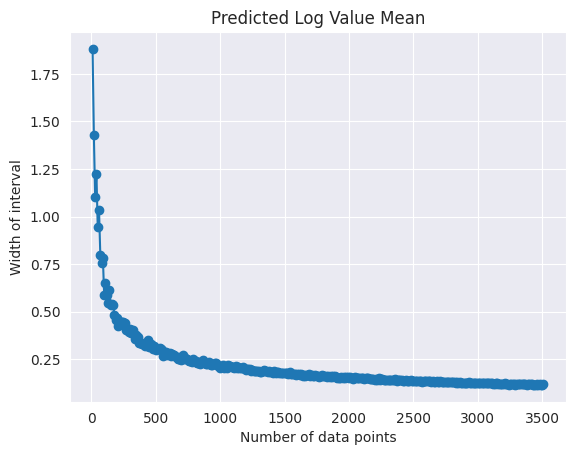

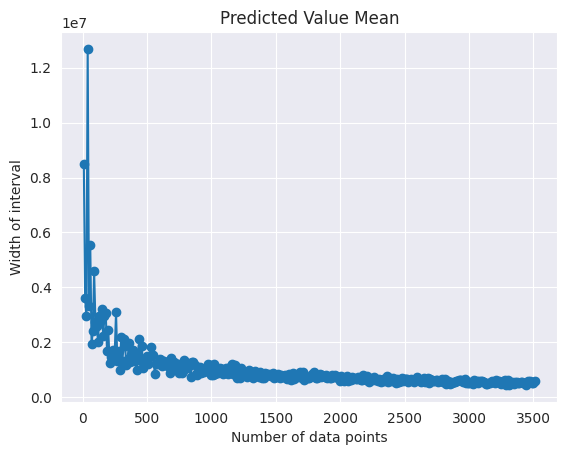

In [15]:
#

n_interval_log_value = [[], []]
n_interval_value = [[], []]

for i in range(10, len(y_test_pred), 10):

    # sampling
    y_test_pred_sampled = np.random.choice(a=y_test_pred, size=i)

    # mean and standad deviation of log Value in predicted test set
    test_mean_log_value_pred = np.mean(y_test_pred_sampled) 
    test_std_log_value_pred = np.std(y_test_pred_sampled)
    # calculate standard error
    std_error_log_pred = test_std_log_value_pred / np.sqrt(len(y_test_pred_sampled))

    # critical value for 99%
    alpha = (1/100)
    alpha = 1-(alpha/2)
    critical_value_log_pred = norm.ppf(alpha)

    # calculate confidece interval using CLT
    norm_ci = [(test_mean_log_value_pred - critical_value_log_pred * std_error_log_pred), 
            (test_mean_log_value_pred + critical_value_log_pred * std_error_log_pred)] 
    n_interval_log_value[0].append(i)
    n_interval_log_value[1].append(norm_ci[1]-norm_ci[0])

    # mean and standad deviation of Value in predicted test set
    test_mean_value_pred = np.mean(np.exp(y_test_pred_sampled)) 
    test_std_value_pred = np.std(np.exp(y_test_pred_sampled))
    # calculate standard error
    std_error_pred = test_std_value_pred / np.sqrt(len(y_test_pred_sampled))

    # critical value for 99%
    alpha = (1/100)
    alpha = 1-(alpha/2)
    critical_value_pred = norm.ppf(alpha)

    # calculate confidece interval using CLT
    norm_ci = [(test_mean_value_pred - critical_value_pred * std_error_pred), 
            (test_mean_value_pred + critical_value_pred * std_error_pred)] 
    n_interval_value[0].append(i)
    n_interval_value[1].append(norm_ci[1]-norm_ci[0])

plt.figure()
plt.plot(n_interval_log_value[0], n_interval_log_value[1], 'o-')
plt.xlabel('Number of data points')
plt.ylabel('Width of interval')
plt.title('Predicted Log Value Mean')
plt.figure()
plt.plot(n_interval_value[0], n_interval_value[1], 'o-')
plt.xlabel('Number of data points')
plt.ylabel('Width of interval')
plt.title('Predicted Value Mean')
plt.show()

#### *Written Answer:* By increasing number of data points, the width of CI of CLT sharply decreases. However, this behaviour was clear because standard erorr has a relation with (1/sqrt(n)).


### Q 1.16 - <span style="color:red">[6]</span> - Randomly subsample your "sample statistic" with $n=30$ and calculate $t$-based 99% CI. Is it a good idea to calculate CI for this data set this way? Why?

In [16]:
# sampling
y_test_pred_sampled = np.random.choice(a=y_test_pred, size=30)


# mean and standad deviation of log Value in predicted test set
test_mean_log_value_pred = np.mean(y_test_pred_sampled) 
test_std_log_value_pred = np.std(y_test_pred_sampled)
# calculate standard error
std_error_log_pred = test_std_log_value_pred / np.sqrt(len(y_test_pred_sampled))

# t value for 99%
alpha = (1/100)
alpha = 1-(alpha/2)
dof = len(y_test_pred_sampled)-1
t_value = t.ppf(alpha, df=dof)

# calculate confidece interval using CLT
t_ci = [(test_mean_log_value_pred - t_value * std_error_log_pred), 
            (test_mean_log_value_pred + t_value * std_error_log_pred)] 
print('\n>  t-based CI 99% mean predicted (Log Value):        {}'.format(t_ci))

# mean and standad deviation of Value in predicted test set
test_mean_value_pred = np.mean(np.exp(y_test_pred_sampled)) 
test_std_value_pred = np.std(np.exp(y_test_pred_sampled))
# calculate standard error
std_error_pred = test_std_value_pred / np.sqrt(len(y_test_pred_sampled))

# t value for 99%
alpha = (1/100)
alpha = 1-(alpha/2)
dof = len(y_test_pred_sampled)-1
t_value = t.ppf(alpha, df=dof)

# calculate confidece interval using CLT
t_ci = [(test_mean_value_pred - t_value * std_error_pred), 
            (test_mean_value_pred + t_value * std_error_pred)] 
print('\n>  t-based CI 99% mean predicted (Value):            {}'.format(t_ci))


>  t-based CI 99% mean predicted (Log Value):        [13.160561960335855, 14.314236226638194]

>  t-based CI 99% mean predicted (Value):            [538319.6599468277, 3173859.3009393443]


#### *Written Answer: It is not good idea in this problem, because we have more than 30 data, and it cab be explanied by near normal distribution.*


### Q 1.17 - <span style="color:red">[3]</span> -  What method would be your ultimate choice for calculating CI for this problem? Why?

#### *Written Answer:* Among Bootstapping, CLT, t-value for this problem, I choose bootstraping for three reasons:
1- Number of data point is high.
2- It gives the confidence interval with shortest width.
3- Training each model takes a very short time.

